In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
from filtering_visualization import data_visualization


In [3]:
# identity DD: 72593, 71427
# identity PC: 129763, 133760
num_source_cl=0
num_target_cl=0
dataset="DailyDialog"
clustering_method="avg_word_embedding"

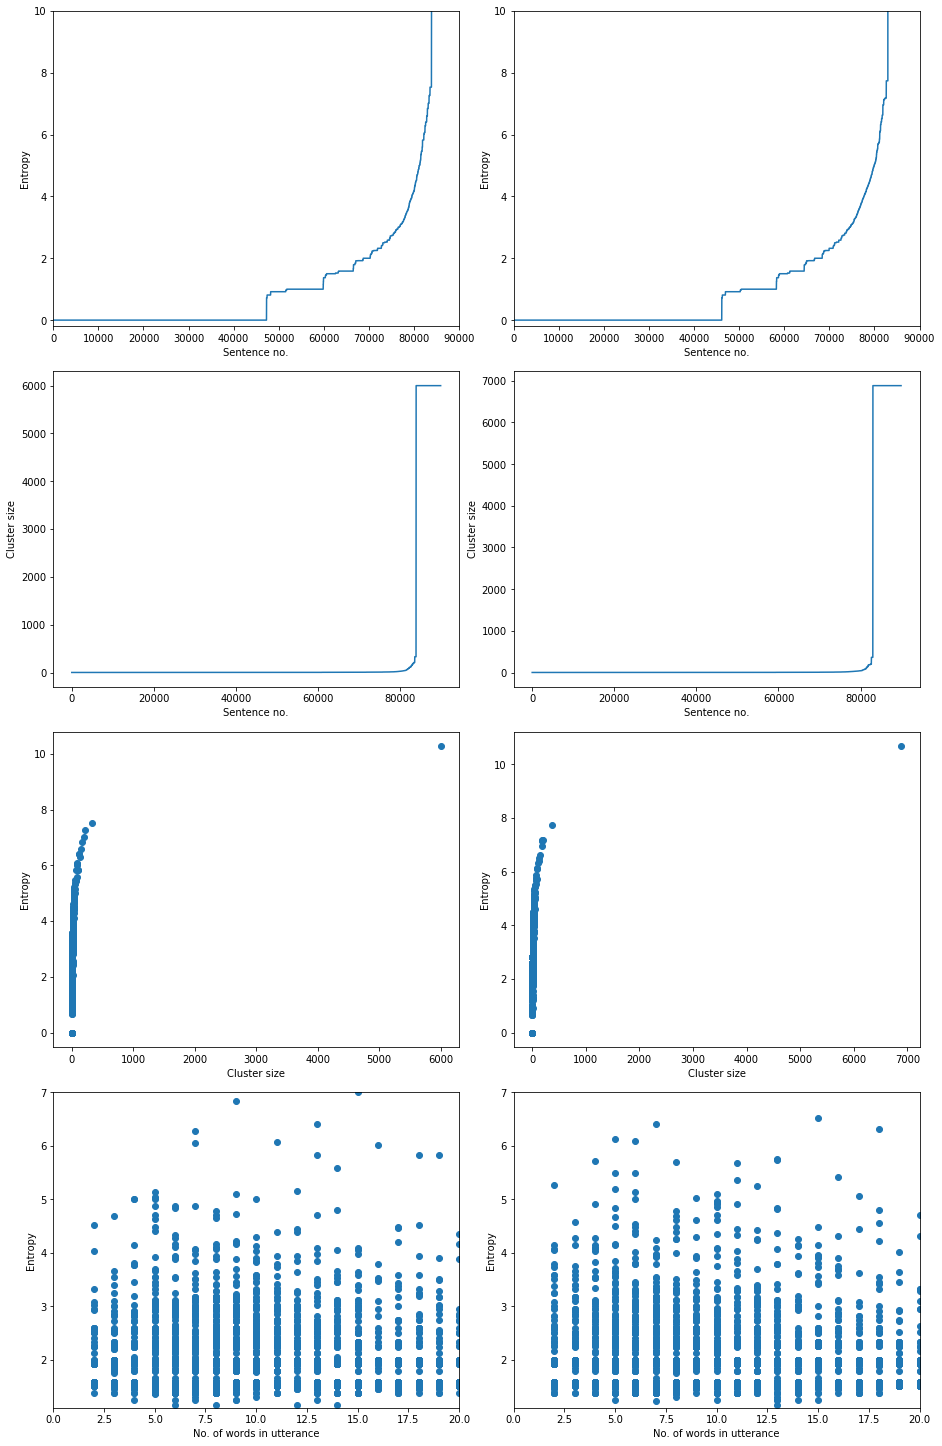

In [4]:
source_entropies, target_entropies, source_cl_sizes, target_cl_sizes = \
    data_visualization(num_source_cl, num_target_cl, dataset, clustering_method)

In [2]:
# compare filtering based on cluster size and entropy
source_cl_sen=[scl[0] for scl in source_cl_sizes]
source_entropy_sen=[m[0] for m in source_entropies]
different=0
first_k=20000

for i, medoid in enumerate(source_entropies[:first_k]):
    if medoid[0] not in source_cl_sen[:first_k]:
        #print(medoid)
        different+=1
print(str(different)+": number of sentences which are different in the first "+str(first_k)
      +", ordered based on entropy and cluster size: ")

for i, medoid in enumerate(source_cl_sizes[:first_k]):
    if medoid[0] not in source_entropy_sen[:first_k]:
        print(medoid)

NameError: name 'source_cl_sizes' is not defined

In [4]:
from filtering_visualization import print_clusters
print_clusters(num_source_cl, num_target_cl, clustering_method, tag='Source')

0.9869355233580379
Medoid: are things still going badly with your houseguest ? Entropy: 6.83936369575424
Size: 175
Elements: 
yes 'm .
yes .


Medoid: would you mind waiting a while ? Entropy: 6.283299496690197
Size: 142
Elements: 
well thank you .
thank you .


Medoid: well how long will it be ? Entropy: 6.055958151615129
Size: 92
Elements: 
are you doing anything tonight ?
hey may how are you doing ?
hey there how are you doing ?
are you sure ?
what 's up how are you ?
how are you doing jim ?
are you sure ? how do you know ?
how much are you asking ?
are you doing anything tomorrow ?
joe how are you doing ?
how are you doing ?
how are you doing andrew ?
are you done ?
how are you ?
how are you doing christopher ?
are you really ?
how are you doing today ?
hey how are you doing ?
how much are you talking ?
how far are you going ?
what are you doing ?
yes how are you doing ?
how are you feeling ?


Medoid: six including two kids . Entropy: 5.134761657503726
Size: 48
Elements: 
may i ha

In [5]:
index = 0

print('Medoid: {}' list(source)[0], source[list(source)[0]])

SyntaxError: invalid syntax (<ipython-input-5-7b33414d52f8>, line 3)